### Regression Analysis in Python

This notebook walks through some basics of regression analysis in Python. Some caveats: This is not meant as a substitute for some formal training...this notebook is intended to give you the ability to execute regression analysis in Python and, hence, use it as a all in one suite of resources. Formal training is important here as the interpretation of output from regression analysis is a subtle thing, in fact [professionals](https://stats.stackexchange.com/questions/185507/what-happens-if-the-explanatory-and-response-variables-are-sorted-independently) and established researchers make mistakes in this domain. 

#### My Take

First, lets ask what we **want** from regression analysis. My take is that as a first pass we want to establish a conditional correlation between some variable $Y$ and another variable $X$. Conditional is an important word here in that in a multivariate setting (you have multiple $X$ variables), then you are establishing a correlation **given the other stuff**. This is different than a simple correlation as that is not controlling for other factors.

Second, let me suggest what this approach does not do, that is establish **Causality**. Even if you have found a relationship, determining causality is a difficult thing to do. There are ways to do it (or at least provide strong suggestive evidence of the causal relationship between two variables), but this is beyond the scope of the course. Hence, we will use language like "the results suggest a strong (conditional) correlation between $X$ and $Y$" versus "$X$ caused $Y$". This last point is especially important in a business context. Arguing for causality when there is none or reverse causality, can lead to bad business decisions. 

Third, linear regression is probably the most basic prediction scheme. Fit a model to data by minimizing the errors between observed values and predicted values. Then use the fitted model to predict an outcome. Two points about this: Again, I would distinguish between causation and prediction. Model that does a good job predicting things need not be good at describing the causal relationship. Second, regression need not be the end point in prediction. These is where topics like Machine Learning come in to provide better prediction schemes. 

#### The Linear Regression Model

So here is the basic linear regression model:

$Y_i = \alpha + \beta X_i + \epsilon_i$

Where we have the $Y_i$ variable indexed by observation $i$, a intercept term $\alpha$, and then $\beta$ times the variable $X_i$. The $\epsilon_i$ are the error terms. They reflect the fact that the model will not fit the data perfectly. These are not observed, but are residuals from the difference between predicted values and observed values. **Thinking about the $\epsilon$s is the most important part of regression analysis.** 

In the context of the Trump example, this would be where $Y_i$ is the county $i$'s vote share that went to Trump. Then $X_i$ is median income in county $i$. 

Regression analysis essentially picks $\alpha$ and $\beta$ to best fit the data. What does this mean, one way to best fit the data is to minimized the errors or another way to put this is the difference between the predicted values $\hat Y$ and the observed values $Y$. Ok, how do you do that. Well one way is the minimize the squared difference, hence the name least squares. That is minimize the squared errors. 

**The error term** In the least squares setting, the underlying assumption for the estimated coefficients (the $\hat \alpha$) and $\hat \beta$ to mean what we think that they mean is the following:

$E(X\epsilon) = 0$

which says that the $X$s should be uncorrelated with the errors. Mechanichally, when you implement least squares, this will always be the case. But that does not make it true. Hence, you should always be thinking...**is there something that I have not controlled for (so it is in the error term) that may be correlated with the Xs**. This is actually harder than it seems, hence, the need for more formal training in this subject. 

#### How to do this in Python

With all this said, lets practice a bit of this.

In [141]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
# This is the new one: information here: http://www.statsmodels.org/stable/index.html

The key module now is this statsmodels. The link to this package is:

http://www.statsmodels.org/stable/index.html

I'm not that familar with R, but the claim is that this is R-like syntax. On the website there are lots of examples and the help is ok. 

Now lets read in our Trump data that we saved from the previous section.

In [142]:
path = "C://data_bootcamp//trump_data.csv" 
       # Lets read in the previous dataset...

trump_data = pd.read_csv(path)

trump_data.head()

,Unnamed: 0,population,income,NAME,county,state,FIPS,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount,_merge,VoteShare,trump_share,red_blue
0,0,55221.0,51281.0,"Autauga County, Alabama",1,1,1001.0,AL,alabama,1001,Autauga,24661,GOP,Trump,18110.0,both,0.734358,0.734358,1.0
1,5,195121.0,50254.0,"Baldwin County, Alabama",3,1,1003.0,AL,alabama,1003,Baldwin,94090,GOP,Trump,72780.0,both,0.773515,0.773515,1.0
2,10,26932.0,32964.0,"Barbour County, Alabama",5,1,1005.0,AL,alabama,1005,Barbour,10390,GOP,Trump,5431.0,both,0.522714,0.522714,1.0
3,15,22604.0,38678.0,"Bibb County, Alabama",7,1,1007.0,AL,alabama,1007,Bibb,8748,GOP,Trump,6733.0,both,0.769662,0.769662,1.0
4,20,57710.0,45813.0,"Blount County, Alabama",9,1,1009.0,AL,alabama,1009,Blount,25384,GOP,Trump,22808.0,both,0.898519,0.898519,1.0


#### Simple Univariate Regression

Lets ask the simple question, what is the relationship between trump share and income. How do we explore this relationship.

In [143]:
results = smf.ols("trump_share ~ income ", # This is the model in variable names we want to estimate
                  data=trump_data).fit()  # this then specifies the dataset (note how it will find the names)
                                          # then the .fit() fits the least squares model (smf.ols specifies that)
    
type(results) # The results is then an object with methods associated with it.

statsmodels.regression.linear_model.RegressionResultsWrapper

So what this id doing is estimating the relationship between the Trump Vote Share and Income. OR:

$ Trump Share_i = \alpha + \beta Median Income_i + \epsilon_i$

where $i$ is at the county level. And it is providing estimates $\hat \alpha$ and $\hat \beta$ to minimize squared errors.

Now lets look at the results:

In [144]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            trump_share   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     115.7
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           1.62e-26
Time:                        14:35:33   Log-Likelihood:                 1416.5
No. Observations:                3111   AIC:                            -2829.
Df Residuals:                    3109   BIC:                            -2817.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7499      0.011     68.508      0.0

This gives a lot of information. Starting from the upper left, it tells us about the data, method of fit, time!, and number of observations, etc. On the upper right side, we see some measures of overall fit, e.g. the R-squared (the amount of variation explained by the X variable) and others. 

Then in the middle panel we see (i) the variable (in this case is the intercept $\hat \alpha$ and then the coeffecient on income (or the $\hat \beta$). Along with this are the standard errors and several interpertiation of the standard error, the t-statisitc, the p-value, and the 0.025 and 0.975 confidence interval.

The bottom panel also provides some more diagnostics. Below that are some warning messages which we will come back to in a bit.

##### Interpreting the results...

So there is a negative relationship between income and the trump share. And the coeffecient on income is clearly statistically different from zero. This is all consistent with our previous work by just simply creating some tables and plots of the data. You should not get fixated on the r-square, it is what it is. Its small, but not zero. 

The warnings.
- The first warning says essentially, inference from the model (i.e. if the coeffecient on income is statistically different from zero) is only valid if the covariance of matrix of errors is specified correctly. This is about the variance of $\sigma_\epsilon$ and if, how it depends on $i$. There are methods (which I will show) that will deliver "robust" standard errors that try and take into account an unknown error term structure. 
- The second error is about the condition number. Here is the issue. We are regressing income which is an orders of magnitude larger than the trump share variable. So we may want to rescale the income variable. Lets do that below.


In [145]:
trump_data["income"] = trump_data["income"]/trump_data["income"].mean()

# This will normalize income relative to the mean...


In [146]:
results = smf.ols("trump_share ~ income ", 
                  data=trump_data).fit()  
                                         

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            trump_share   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     115.7
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           1.62e-26
Time:                        14:35:46   Log-Likelihood:                 1416.5
No. Observations:                3111   AIC:                            -2829.
Df Residuals:                    3109   BIC:                            -2817.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7499      0.011     68.508      0.0

Then notice how the condition number warning went away. And the benefit is that the coeffecient is way more interpeterable. **What does it mean?**

Lets do one more thing, lets take the log of income as well.

In [147]:
results = smf.ols("trump_share ~ np.log(income)", # To take logs, simply say np.log in the formla and it will  
                  data=trump_data).fit()          # Automatically do it
                                          

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            trump_share   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     61.88
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           4.99e-15
Time:                        14:36:01   Log-Likelihood:                 1390.4
No. Observations:                3111   AIC:                            -2777.
Df Residuals:                    3109   BIC:                            -2765.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6332      0.003    226.

#### Multivariate Regression

Per the setup in the previous notebook, what is the relationship between trump share and income and size (as a proxy for rural-urban split). So now we are adding a second $X$ variable. This is what is sometimes called multivariate regression.

In [148]:
trump_data["population"] = trump_data["population"]/trump_data["population"].mean()

# Lets scale this as well...

In [149]:
results = smf.ols("trump_share ~ income + population",  # Now just add the second variable
                  data=trump_data).fit()  
                                         

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            trump_share   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     235.7
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           4.81e-96
Time:                        14:37:09   Log-Likelihood:                 1579.4
No. Observations:                3111   AIC:                            -3153.
Df Residuals:                    3108   BIC:                            -3135.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7180      0.011     68.182      0.0

Here we see, negative coeffecients on income and population. Again, consistent with the tables and plots we made. Furthermore, note how the explanatory power jumped up.

Let's put this in logs...

In [150]:
results = smf.ols("trump_share ~ np.log(income) + np.log(population)",  # Now just add the second variable
                  data=trump_data).fit()  
                                         

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            trump_share   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     527.5
Date:                Mon, 27 Nov 2017   Prob (F-statistic):          5.83e-198
Time:                        14:37:19   Log-Likelihood:                 1814.3
No. Observations:                3111   AIC:                            -3623.
Df Residuals:                    3108   BIC:                            -3604.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5682      0

Note a couple of things happened here:
- The R-square went up a bunch...as a predictive scheme, this is a positive development.
- However, the coeffecient on income flipped. **Here is where our prework helps** This may be some symptom of mis-specification...recall how it looked like the income effect was an inverted U. One way to capture that is to put in a square term for income. 

Lets do that:

In [24]:
results = smf.ols('''trump_share ~ np.log(income) + np.square(np.log(income))
                  +  np.log(population)''',  # Now just add the second variable
                  data=trump_data).fit()  
                                         

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            trump_share   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     461.6
Date:                Mon, 27 Nov 2017   Prob (F-statistic):          5.35e-248
Time:                        11:03:56   Log-Likelihood:                 1933.0
No. Observations:                3111   AIC:                            -3858.
Df Residuals:                    3107   BIC:                            -3834.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Now look what happened. 
- R-square went up. 
- The coeffecient on the square term is negative. **This is consistent with what we saw earlier!** I would call this strong evidence that there is a inverted U relationship between income and the share of vote going towards Trump. 
- Finally, it is worth noting still that population size matters a lot. Larger counties are farm more likely to have higher vote shares for Trump.

### Plotting the Regression Line

There are many ways to do this. I'll just talk through one approach using `statsmodels` with `matplotlib`. Another approach is to use the [`seaborne` package](https://seaborn.pydata.org/tutorial/regression.html). The other issue with this is it can be hard to visualize a multidimensional relationship; there are ways to do this by just doing a partial regression approach. `seaborne` has built in procedures for it.

Below, I'll just look at a simple bivariate relationship between the trump share and population. 

In [151]:
results = smf.ols('''trump_share ~ np.log(population)''', 
                  data=trump_data).fit()  
                                         

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            trump_share   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     1048.
Date:                Mon, 27 Nov 2017   Prob (F-statistic):          1.95e-198
Time:                        14:37:39   Log-Likelihood:                 1811.3
No. Observations:                3112   AIC:                            -3619.
Df Residuals:                    3110   BIC:                            -3606.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5695      0

To generate a plot with the regression line and the scattered relationship, I'll use one of the methods associated with the `results` object, `.predict` which generates predicted values. I'll then use our `fig`, `ax` approach to create a scatter plot and then layer the predicted regression line on top of it.

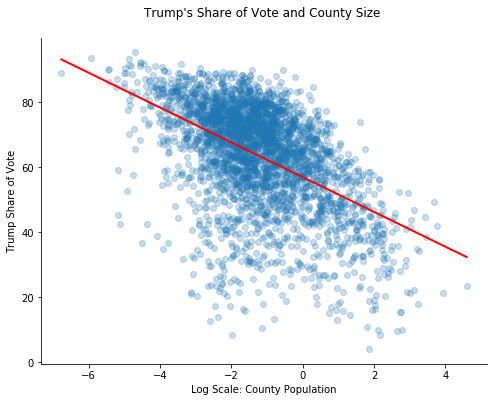

In [140]:
trump_pred = results.predict(exog = trump_data["population"].sort_values())
           # This generages the predicted values. Two notes here:
           # (1) There is no need to transform it, given how the model is specified
           # it already understands that the data needs to be transformed.
           # (2) I'm going to sort the values just so we can create a smooth line. 

fig, ax = plt.subplots(figsize = (8,6))

ax.scatter(np.log(trump_data["population"]), 
         100*trump_data["trump_share"], 
         alpha = .25)

ax.plot(np.log(trump_data["population"].sort_values()),100*trump_pred, color = 'r', linewidth = 2.0)
       # Then I put in the sorted population values
       # then the precited trump share.... 

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Trump's Share of Vote and County Size \n")
ax.set_ylabel("Trump Share of Vote") 
ax.set_xlabel("Log Scale: County Population")

plt.show()